# California House Price Prediction

In [1]:
#Let's kick things off by importing all the needed packages and libraries 

#Importing packages for getting data ready and preprocessing
import pandas as pd
import numpy as np


#Importing packages for modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

#Importing packages for visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

We will be using the california dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [2]:
# Getting the california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Next, we are going to convert our dataset to a dataframe with the feature_names as our columns

In [4]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Looks good! Now let's add the 'target' column in the housing dataset to our dataframe

In [5]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
housing_df['MedHouseVal'] = housing_df.target
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [7]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


Let's check the length of our dataframe

In [8]:
len(housing_df)

20640

In [9]:
housing_df = housing_df.drop(columns=['target'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
housing_df['MedHouseVal'] = housing_df['MedHouseVal'] * 100000
housing_df['MedHouseVal'] 

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: MedHouseVal, Length: 20640, dtype: float64

In [11]:
new_df = housing_df.head(500)
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
495,5.3794,52.0,6.861017,1.123729,1316.0,2.230508,37.86,-122.25,376900.0
496,3.2619,52.0,4.792053,1.017219,1508.0,1.997351,37.85,-122.26,309600.0
497,2.7054,52.0,5.001227,1.128834,1800.0,2.208589,37.85,-122.27,182300.0
498,2.2431,47.0,6.371166,1.226994,719.0,2.205521,37.85,-122.27,172700.0


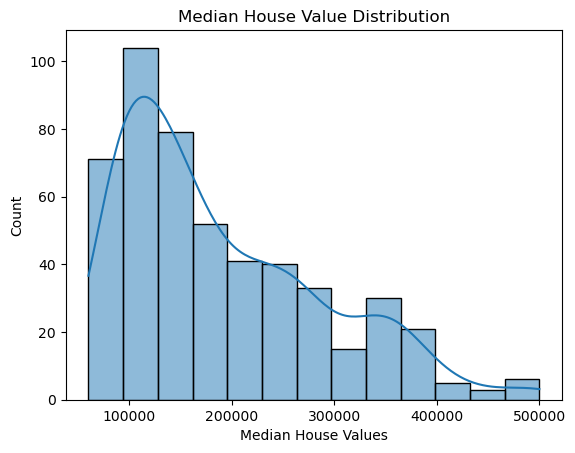

In [12]:
sns.histplot(new_df['MedHouseVal'], kde=True)
plt.title('Median House Value Distribution')
plt.xlabel('Median House Values')
plt.show()

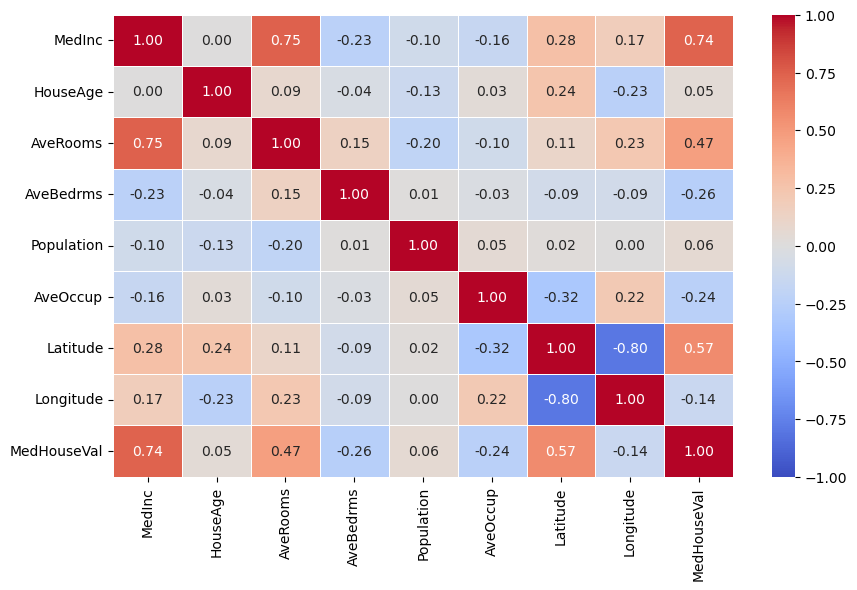

In [13]:
# Visualizing the correlation matrix of our data
corr_matrix = new_df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="coolwarm",
                vmin=-1, vmax=1);

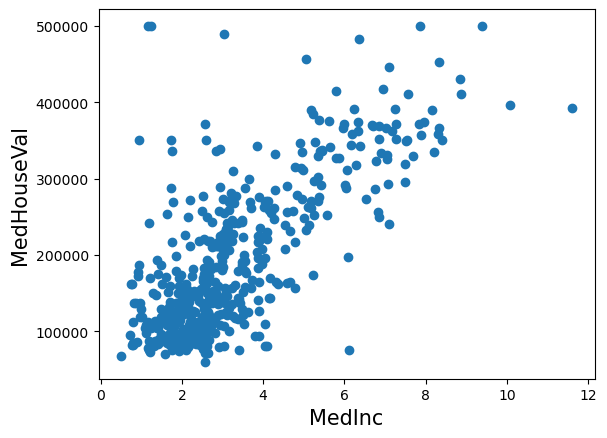

In [14]:
plt.scatter(data=new_df, x="MedInc", y="MedHouseVal")
plt.xlabel('MedInc', fontsize=15)
plt.ylabel('MedHouseVal', fontsize=15);

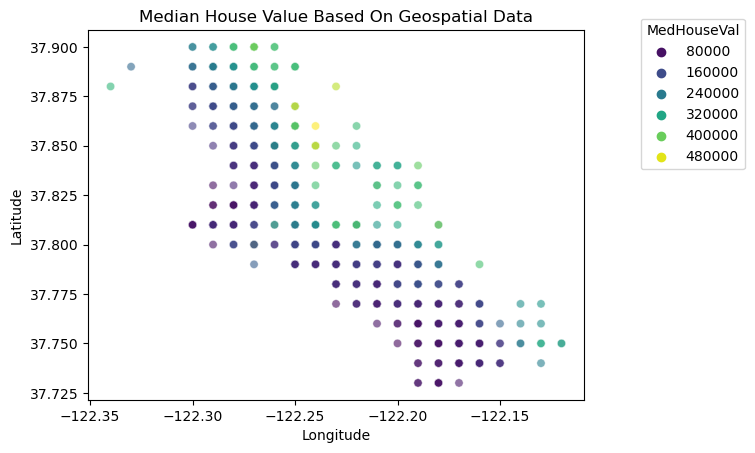

In [15]:
sns.scatterplot(data=new_df, x="Longitude", y="Latitude", hue='MedHouseVal', palette='viridis', alpha=0.6)
plt.legend(title= 'MedHouseVal', bbox_to_anchor = (1.10, 1.05), loc='upper left')
plt.title('Median House Value Based On Geospatial Data');

Next, we are going to train a model and score it using the Ridge estimator

In [16]:
# Defining X and y
X = new_df.drop("MedHouseVal", axis = 1)
y = new_df["MedHouseVal"]

In [17]:
# Splitting into train and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
# First of all, Let us try the Ridge Regression algorithm 

np.random.seed(42)

# Instantiating and fitting the Ridge model (on the training set)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Checking the score of our model (on the test set)
ridge_model.score(X_test, y_test)

0.5929714944657849

In [18]:
# Next, let us try the LinearRegression algorithm 

# Setting up random seed
np.random.seed(42)

# Fitting LinearRegression model (on the training set)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Checking the score of our model (on the test set)
linear_model.score(X_test, y_test)

0.7232642069747748

In [19]:
# Finally, let us try the RandomForest Regressor algorithm 

# Setting up random seed
np.random.seed(42)

# Fitting RandomForest model (on the training set)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Checking the score of our model (on the test set)
rf_model.score(X_test, y_test)

0.781942468562336

In [20]:
# Selecting the best model
best_model = rf_model
best_model

RandomForestRegressor()

In [21]:
# Making predictions 
y_pred = best_model.predict(X_test)
y_pred

array([152499.  ,  97364.  , 265184.  , 191770.  , 238365.04, 134634.  ,
        85493.  , 249287.03, 223689.  , 241479.  , 111119.  , 111494.  ,
       196982.  , 152294.  , 119937.  ,  87730.  , 207428.  , 167903.  ,
       376319.12, 139895.  , 139537.03, 282942.  , 149161.  , 244588.  ,
       202124.  , 186761.  , 123683.  , 268502.  , 235084.  , 196142.  ,
       246682.  , 354070.  , 364830.02, 115393.  , 125973.  , 218207.03,
        92767.01, 181896.  , 130147.  , 118475.  ,  81309.  , 152874.  ,
       391040.08, 198335.  , 135667.  , 403139.24, 124410.  ,  97840.  ,
       370650.01, 241167.  , 115564.  , 126014.01,  87474.  , 235618.  ,
       352642.04, 234265.  , 122811.  , 126857.  , 202030.  ,  91514.  ,
       104650.  , 156761.  , 229656.  , 279063.  , 134161.  , 110202.05,
       246696.  , 185717.02, 263272.  , 157872.  , 339398.  ,  94081.  ,
        85094.  , 171112.  , 121195.  , 300593.03, 122171.  , 214323.  ,
       334572.  ,  97416.  ,  89004.  , 140221.  , 

In [22]:
len(y_pred)

125

In [41]:
# Savingvthe model
import pickle 

pickle.dump(best_model, open('rfreg.pkl', 'wb'))

In [24]:
# Loading the model
loaded_model = pickle.load(open("randomforest.pkl", "rb"))

### Evaluation

We are going to use the following to evaluate our model:

1. R^2 (pronounced r-squared) or coefficient of determination

2. Mean Absolute Error(MAE)

3. Mean Squared Error (MSE)

#### 1. r2_score/R-Squared/coefficient of determination

**What R-squared does:** It compares your model's predictions to the mean targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers, its R^2 score would be 1.

In [25]:
loaded_model.score(X_test, y_test)

0.781942468562336

In [26]:
# Making predictions on our loaded model 
y_preds = loaded_model.predict(X_test)

#### 2. Mean Absolute Error (MAE)

**MAE** is the average of the absolute difference between predictions and actual values

It gives you an idea of how wrong your model's predictions are.

In [27]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_preds)
mae

29669.982

In [28]:
df = pd.DataFrame(data = {"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"]- df["actual values"]
df.head(10)

,actual values,predicted values,differences
90,162500.0,152499.00,-10001.00
254,102400.0,97364.00,-5036.00
283,371000.0,265184.00,-105816.00
445,185600.0,191770.00,6170.00
461,241700.0,238365.04,-3334.96
15,140000.0,134634.00,-5366.00
316,70000.0,85493.00,15493.00
489,489600.0,249287.03,-240312.97
159,243800.0,223689.00,-20111.00
153,314700.0,241479.00,-73221.00


In [29]:
df["differences"].mean()

1675.9093600000003

In [30]:
np.abs(df["differences"]).mean()

29669.982

#### 3. Mean Squared Error (MSE)

**MSE** is the mean of the square of errors between actual and predicted values.

In [31]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_preds)
mse

2101581283.6556394

In [32]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
90,162500.0,152499.00,-10001.00,1.000200e+08
254,102400.0,97364.00,-5036.00,2.536130e+07
283,371000.0,265184.00,-105816.00,1.119703e+10
445,185600.0,191770.00,6170.00,3.806890e+07
461,241700.0,238365.04,-3334.96,1.112196e+07


In [33]:
# Calculating MSE by hand
squared = np.square(df["differences"])
squared.mean()

2101581283.6556394

In [34]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.head()

,actual values,predicted values,differences,squared_differences
90,162500.0,152499.00,-10001.00,1.600000e+01
254,102400.0,97364.00,-5036.00,2.536130e+07
283,371000.0,265184.00,-105816.00,1.119703e+10
445,185600.0,191770.00,6170.00,3.806890e+07
461,241700.0,238365.04,-3334.96,1.112196e+07


In [35]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

2100781123.7756393

In [36]:
# Our data frame is not accurate but it is just for example purposes 
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
90,162500.0,152499.00,-10001.00,1.600000e+01
254,20.0,20.00,20.00,2.000000e+01
283,20.0,20.00,20.00,2.000000e+01
445,20.0,20.00,20.00,2.000000e+01
461,20.0,20.00,20.00,2.000000e+01
...,...,...,...,...
430,235600.0,240119.00,4519.00,2.042136e+07
49,112500.0,141751.00,29251.00,8.556210e+08
134,335200.0,420149.27,84949.27,7.216378e+09
365,311100.0,253704.00,-57396.00,3.294301e+09


In [37]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

218761867.4263992

In [38]:
# Evaluate model using evaluation functions 
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.781942468562336
MAE: 29669.982
MSE: 2101581283.6556394


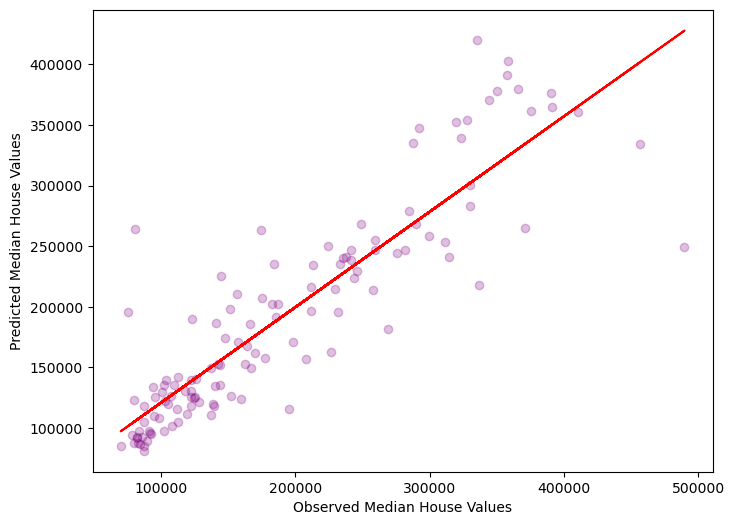

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_preds, c="purple", alpha=0.25)

# Adding trendline
z = np.polyfit(y_test, y_preds, 1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test),"red")
plt.ylabel('Predicted Median House Values')
plt.xlabel('Observed Median House Values');

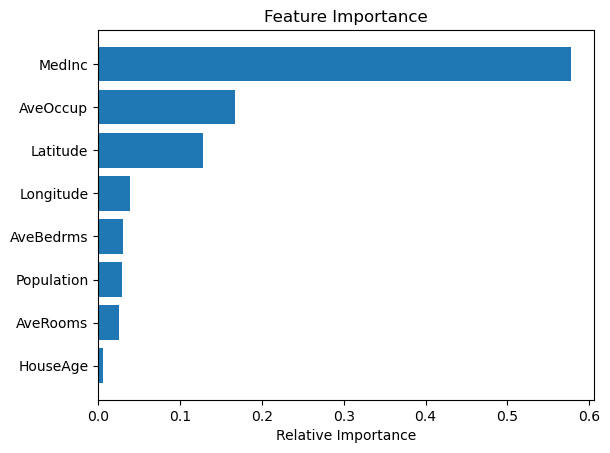

In [40]:
importance = loaded_model.feature_importances_
indices = range(len(importance))

# Rearranging feature names so they match our sorted feature importances
names = [housing.feature_names[i] for i in importance.argsort()]

# Plotting feature importance
plt.figure()
plt.title('Feature Importance')
plt.barh(indices, sorted(importance), align = 'center')
plt.yticks(indices, names)
plt.xlabel('Relative Importance')
plt.show()